In [1]:
import pandas as pd
import numpy as np

In [3]:
lapdata = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

In [4]:
import wget

dataset = wget.download(lapdata)

100% [............................................................................] 298573 / 298573

In [5]:
dataset

'laptops.csv'

In [178]:
df = pd.read_csv(dataset)

In [179]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [180]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [181]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [182]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [183]:
num = list(df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index)
num

['ram', 'storage', 'screen', 'final_price']

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\srira\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='final_price', ylabel='Count'>

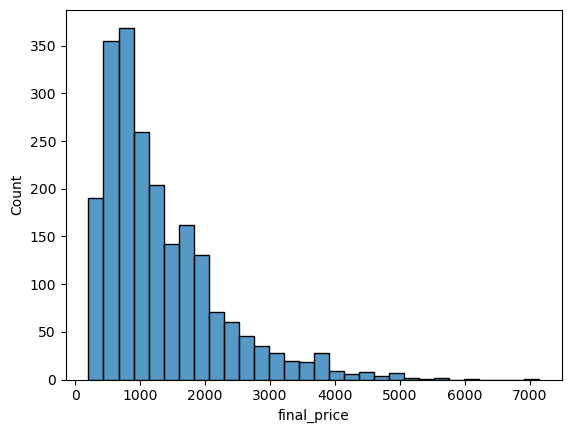

In [185]:
sns.histplot(df['final_price'], bins = 30)

In [186]:
missing_values = df[['ram', 'storage', 'screen', 'final_price']].isnull().sum()
missing_column

screen    4
dtype: int64

In [187]:
med = df['ram'].median()

In [188]:
med

16.0

In [189]:
filtered_df = df[['ram', 'storage', 'screen', 'final_price']]
filtered_df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [190]:
n = len(filtered_df)

In [191]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [192]:
n, n_val + n_test + n_train

(2160, 2160)

In [193]:
idx = np.arange(n)

In [194]:
np.random.seed(42)
np.random.shuffle(idx)

In [195]:
df_train = filtered_df.iloc[idx[:n_train]]
df_val = filtered_df.iloc[idx[n_train:n_val+n_train]]
df_test = filtered_df.iloc[idx[n_val + n_train:]]

In [196]:
df_train

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
...,...,...,...,...
1777,8,256,14.0,549.00
183,32,1000,16.0,1999.00
137,16,512,15.6,1059.00
899,16,512,14.0,1671.00


In [197]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [198]:
df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [199]:
df_train.isna().sum()

ram            0
storage        0
screen         3
final_price    0
dtype: int64

In [200]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [201]:
y_train

array([1123.29,  201.05,  997.74, ..., 1059.  , 1671.  , 1056.  ])

In [202]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [203]:
df_train

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0
...,...,...,...
1291,8,256,14.0
1292,32,1000,16.0
1293,16,512,15.6
1294,16,512,14.0


In [204]:
df_train_0 = df_train.copy()
df_val_0 = df_val.copy()
df_test_0 = df_test.copy()

df_train_0['screen'] = df_train_0['screen'].fillna(0)
df_val_0['screen'] = df_val_0['screen'].fillna(0)
df_test_0['screen'] = df_test_0['screen'].fillna(0)

In [205]:
df_train_0.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [206]:
screen_mean = df_train['screen'].mean()

In [207]:
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()
df_test_mean = df_test.copy()

df_train_mean['screen'] = df_train_mean['screen'].fillna(screen_mean)
df_val_mean['screen'] = df_val_mean['screen'].fillna(screen_mean)
df_test_mean['screen'] = df_test_mean['screen'].fillna(screen_mean)

In [208]:
df_train_mean.isna().sum()

ram        0
storage    0
screen     0
dtype: int64

In [209]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [210]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [211]:
x_train_0 = df_train_0.values
x_val_0 = df_val_0.values

In [212]:
w0_0, w_0 = train_linear_regression(x_train_0, y_train)
y_pred_0 = w0_0 + x_val_0.dot(w_0)
rmse_0 = rmse(y_val, y_pred_0)

In [213]:
rmse_0

597.3635593619621

In [214]:
round(rmse_0, 2)

597.36

In [215]:
x_train_mean = df_train_mean.values
x_val_mean = df_val_mean.values

In [216]:
w0_mean, w_mean = train_linear_regression(x_train_mean, y_train)
y_pred_mean = w0_mean + x_val_mean.dot(w_mean)
rmse_mean = rmse(y_val, y_pred_mean)

In [217]:
rmse_mean

600.2650313748422

In [218]:
round(rmse_mean, 2)

600.27

In [219]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [220]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    x_train_0 = df_train_0.values
    w0, w = train_linear_regression_reg(x_train_0, y_train, r=r)

    x_val_0 = df_val_0.values
    y_pred = w0 +x_val_0.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score, 2))

0 676.8954853003158 597.36
0.01 676.2736817204283 597.36
0.1 670.7284836312938 597.35
1 619.9030834107112 597.21
5 463.77716971420216 597.01
10 352.79713367677226 597.06
100 66.92071440180858 597.9


In [221]:
filtered_df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [222]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []


for seed in seed_values:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = filtered_df.iloc[idx[:n_train]]
    df_val = filtered_df.iloc[idx[n_train:n_val+n_train]]
    df_test = filtered_df.iloc[idx[n_val + n_train:]]

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    df_train_0 = df_train.copy()
    df_val_0 = df_val.copy()
    df_test_0 = df_test.copy()

    df_train_0['screen'] = df_train_0['screen'].fillna(0)
    df_val_0['screen'] = df_val_0['screen'].fillna(0)
    df_test_0['screen'] = df_test_0['screen'].fillna(0)

    x_train_0 = df_train_0.values
    x_val_0 = df_val_0.values

    w0_0, w_0 = train_linear_regression(x_train_0, y_train)

    y_pred_0 = w0_0 + x_val_0.dot(w_0)

    rmse_score = rmse(y_val, y_pred_0)
    rmse_scores.append(rmse_score)

std_rmse = np.std(rmse_scores)

In [223]:
round(std_rmse,3)

29.176

In [229]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = filtered_df.iloc[idx[:n_train]]
df_val = filtered_df.iloc[idx[n_train:n_val+n_train]]
df_test = filtered_df.iloc[idx[n_val + n_train:]]

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

df_train_0 = df_train.copy()
df_val_0 = df_val.copy()
df_test_0 = df_test.copy()

df_train_0['screen'] = df_train_0['screen'].fillna(0)
df_val_0['screen'] = df_val_0['screen'].fillna(0)
df_test_0['screen'] = df_test_0['screen'].fillna(0)

x_train_0 = df_train_0.values
x_val_0 = df_val_0.values
x_test_0 = df_test_0.values

df_full_train = pd.concat([df_train_0, df_val_0])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = df_full_train.values

y_full_train = np.concatenate([y_train, y_val])

w0_0, w_0 = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

y_pred_0 = w0_0 + x_test_0.dot(w_0)

rmse_score = rmse(y_test, y_pred_0)

In [230]:
rmse_score

608.6099822049533